<a href="https://colab.research.google.com/github/LudovicaCi/PodcastSentimentAnalyzer/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiers Evaluation


# Import Dataset

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/trainingSet.csv')

In [ ]:
# Check for the presence of NaN values in rows
nan_rows = train_df[train_df.isnull().any(axis=1)]

# Print the rows containing NaN values
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
      content    rating
455       NaN  positive
716       NaN  positive
768       NaN  positive
1597      NaN  positive
1821      NaN  positive
...       ...       ...
78047     NaN  negative
78054     NaN  negative
78457     NaN  negative
78915     NaN  negative
78964     NaN  negative

[485 rows x 2 columns]


In [ ]:
train_df = train_df.dropna()

In [ ]:
# Calculate the size of the dataset
dataset_size = train_df.shape[0]

# Print the dataset size
print("Dimensione del dataset:", dataset_size)

Dimensione del dataset: 78751


In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer
stemmer = EnglishStemmer()

# Update the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Define the custom analysis function
def custom_analyzer(text):
    # Remove accents
    text = ''.join(char for char in text if char not in string.punctuation)
    # Tokenization and lowercase
    tokens = text.lower().split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))  # Replace with the appropriate language
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()  # Replace with the appropriate language
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

analyzer = CountVectorizer().build_analyzer()
X = train_df['content'].values  # Text
y = train_df['rating'].values  # Sentiment
target_names = ['negative', 'neutral', 'positive']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Multinomial Naive Bayes Classifier Evaluation
This script evaluates the performance of a Multinomial Naive Bayes classifier using a pipeline with text preprocessing steps. The pipeline includes a custom text analyzer, CountVectorizer for feature extraction, TfidfTransformer for term frequency-inverse document frequency transformation, and the Multinomial Naive Bayes classifier. The evaluation is conducted through cross-validation to ensure robustness.

Accuracy MultinomialNB : 0.72 (+/- 0.01)
              precision    recall  f1-score   support

    negative       0.70      0.66      0.68     26270
     neutral       0.65      0.67      0.66     26216
    positive       0.82      0.84      0.83     26265

    accuracy                           0.72     78751
   macro avg       0.72      0.72      0.72     78751
weighted avg       0.72      0.72      0.72     78751

[[17438  6920  1912]
 [ 5846 17530  2840]
 [ 1778  2527 21960]]


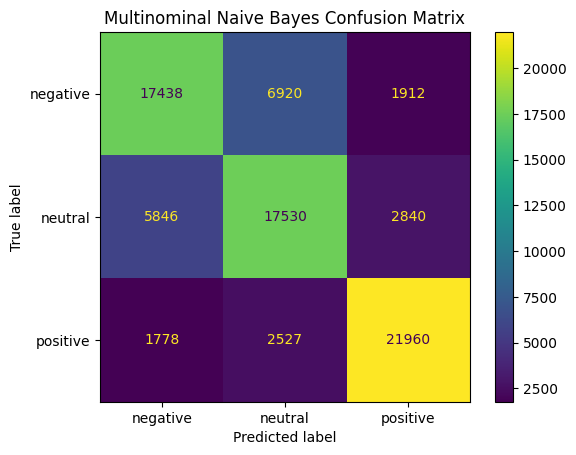

In [ ]:
#Pipeline Classifier1
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer=custom_analyzer, max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha = 2.0)),
])

#calculating accuracies in cross-valudation
scores = cross_val_score(text_clf, X, y, cv=10)
print("Accuracy MultinomialNB : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf, X, y, cv=10)


print(metrics.classification_report(y, predicted,
                                    target_names=target_names))  # metrics extractions (precision    recall  f1-score   support)
print(metrics.confusion_matrix(y, predicted))
ConfusionMatrixDisplay.from_predictions(y,predicted)
plt.title("Multinominal Naive Bayes Confusion Matrix")
plt.show()

# Decision Tree Classifier Evaluation
This script evaluates the performance of a Decision Tree classifier using a pipeline with text preprocessing steps. The pipeline includes a custom text analyzer, CountVectorizer for feature extraction (limited to 3000 features), TfidfTransformer for term frequency-inverse document frequency transformation, feature selection using SelectKBest with chi-squared test, and the Decision Tree classifier with a maximum number of leaf nodes set to 30. The evaluation is conducted through cross-validation to ensure robustness.

Accuracy Decision Tree : 0.53 (+/- 0.01)
              precision    recall  f1-score   support

    negative       0.46      0.79      0.58     26270
     neutral       0.51      0.21      0.30     26216
    positive       0.66      0.58      0.62     26265

    accuracy                           0.53     78751
   macro avg       0.55      0.53      0.50     78751
weighted avg       0.55      0.53      0.50     78751

[[20777  2760  2733]
 [15514  5551  5151]
 [ 8575  2483 15207]]


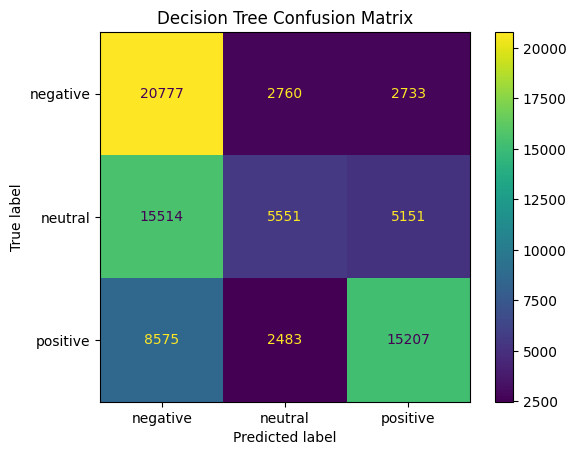

In [ ]:
#Pipeline Classifier2
text_clf2 = Pipeline([
    ('vect', CountVectorizer(analyzer=custom_analyzer, max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('feat_sel', SelectKBest(chi2,k=10)),
    ('clf', tree.DecisionTreeClassifier(max_leaf_nodes=30)),
])

#calculating accuracies in cross-valudation
scores2 = cross_val_score(text_clf2, X, y, cv=10)
print("Accuracy Decision Tree : %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf2, X, y, cv=10)

print(metrics.classification_report(y, predicted,
                                    target_names=target_names))  # metrics extractions (precision    recall  f1-score   support)
print(metrics.confusion_matrix(y, predicted))
ConfusionMatrixDisplay.from_predictions(y,predicted)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Linear Support Vector Classifier (SVC) Evaluation
This script evaluates the performance of a Linear Support Vector Classifier (SVC) using a pipeline with text preprocessing steps. The pipeline includes a custom text analyzer, CountVectorizer for feature extraction (limited to 3000 features), TfidfTransformer for term frequency-inverse document frequency transformation, and the Linear SVC classifier with a regularization parameter (C) set to 0.01. The evaluation is conducted through cross-validation to ensure robustness.

Accuracy SVM : 0.73 (+/- 0.01)
              precision    recall  f1-score   support

    negative       0.67      0.73      0.70     26270
     neutral       0.69      0.62      0.65     26216
    positive       0.81      0.83      0.82     26265

    accuracy                           0.73     78751
   macro avg       0.73      0.73      0.72     78751
weighted avg       0.73      0.73      0.73     78751

[[19122  5256  1892]
 [ 6828 16174  3214]
 [ 2494  1857 21914]]


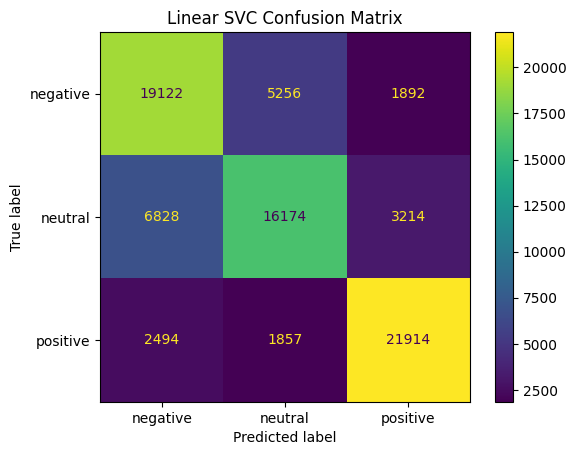

In [ ]:
#Pipeline Classifier3
text_clf3 = Pipeline([
    ('vect', CountVectorizer(analyzer=custom_analyzer, max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('clf', svm.LinearSVC(C=0.01)),
])

#calculating accuracies in cross-valudation
scores3 = cross_val_score(text_clf3, X, y, cv=10)
print("Accuracy SVM : %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf3, X, y, cv=10)

print(metrics.classification_report(y, predicted,
                                    target_names=target_names))  # metrics extractions (precision    recall  f1-score   support)
print(metrics.confusion_matrix(y, predicted))
ConfusionMatrixDisplay.from_predictions(y,predicted)
plt.title("Linear SVC Confusion Matrix")
plt.show()

# K-Nearest Neighbors (KNN) Classifier Evaluation
This script evaluates the performance of a K-Nearest Neighbors (KNN) classifier using a pipeline with text preprocessing steps. The pipeline includes a custom text analyzer, CountVectorizer for feature extraction (limited to 3000 features), TfidfTransformer for term frequency-inverse document frequency transformation, and the KNN classifier with specific parameters (e.g., n_neighbors=280, weights='distance', n_jobs=-1). The evaluation is conducted through cross-validation to ensure robustness.

Accuracy KNN : 0.34 (+/- 0.00)
              precision    recall  f1-score   support

    negative       0.70      0.02      0.03     26270
     neutral       0.57      0.01      0.01     26216
    positive       0.34      0.99      0.50     26265

    accuracy                           0.34     78751
   macro avg       0.54      0.34      0.18     78751
weighted avg       0.54      0.34      0.18     78751

[[  466    83 25721]
 [  109   195 25912]
 [   88    65 26112]]


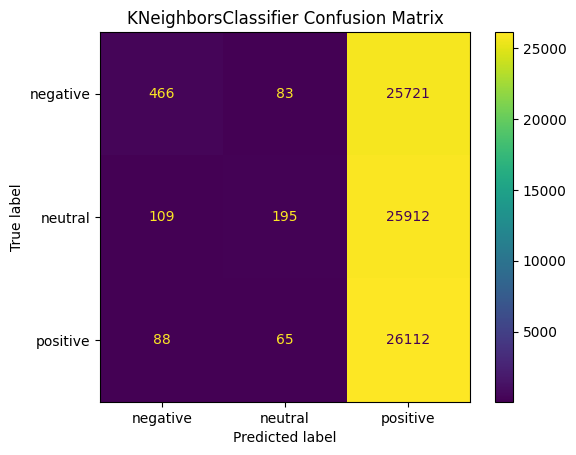

In [ ]:
#Pipeline Classifier4
text_clf4 = Pipeline([
    ('vect', CountVectorizer(analyzer=custom_analyzer, max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=280, weights='distance',n_jobs=-1)),
])
#calculating accuracies in cross-valudation
scores4 = cross_val_score(text_clf4, X, y, cv=10)
print("Accuracy KNN : %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf4, X, y, cv=10)

print(metrics.classification_report(y, predicted,target_names=target_names)) # metrics extractions (precision recall f1-score support)
print(metrics.confusion_matrix(y, predicted))

ConfusionMatrixDisplay.from_predictions(y, predicted)
plt.title("KNeighborsClassifier Confusion Matrix")
plt.show()

# Random Forest Classifier Evaluation
This script evaluates the performance of a Random Forest classifier using a pipeline with text preprocessing steps. The pipeline includes a custom text analyzer, CountVectorizer for feature extraction (limited to 3000 features), TfidfTransformer for term frequency-inverse document frequency transformation, and the Random Forest classifier. The evaluation is conducted through cross-validation to ensure robustness.

Accuracy RandomForest : 0.69 (+/- 0.01)
              precision    recall  f1-score   support

    negative       0.66      0.64      0.65     26270
     neutral       0.64      0.63      0.63     26216
    positive       0.77      0.80      0.79     26265

    accuracy                           0.69     78751
   macro avg       0.69      0.69      0.69     78751
weighted avg       0.69      0.69      0.69     78751

[[16880  6773  2617]
 [ 6010 16590  3616]
 [ 2507  2735 21023]]


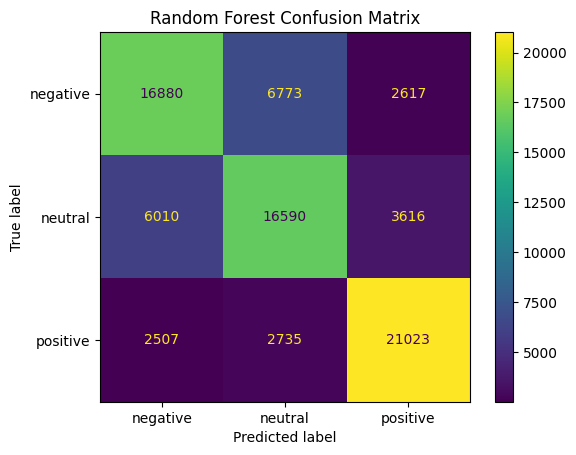

In [ ]:
#Pipeline Classifier5
text_clf5 = Pipeline([
    ('vect', CountVectorizer(analyzer=custom_analyzer, max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

#calculating accuracies in cross-valudation
scores5 = cross_val_score(text_clf5, X, y, cv=10)
print("Accuracy RandomForest : %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

# prediction in cross-validation
predicted = cross_val_predict(text_clf5, X, y, cv=10)

print(metrics.classification_report(y, predicted,target_names=target_names)) # metrics extractions (precision recall f1-score support)
print(metrics.confusion_matrix(y, predicted))

ConfusionMatrixDisplay.from_predictions(y, predicted)
plt.title("Random Forest Confusion Matrix")
plt.show()

# T-Test

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from scipy import stats

def paired_ttest_kfold_cv(estimator1, estimator2, X, y, cv, random_seed=42):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=random_seed)

    scores1 = cross_val_score(estimator1, X, y, cv=kfold, scoring='accuracy')
    scores2 = cross_val_score(estimator2, X, y, cv=kfold, scoring='accuracy')

    t_statistic, p_value = stats.ttest_rel(scores1, scores2)

    return t_statistic, p_value

t, p = paired_ttest_kfold_cv(estimator1=text_clf, estimator2=text_clf3, X=X, y=y, cv=10, random_seed=1)

print('T-Statistic:', t)
print('P-Value:', p)

# Confronta il p-value con un livello di significatività (0.05) per determinare la significatività statistica
alpha = 0.05
if p < alpha:
    print("I risultati sono statisticamente significativi: rifiuto l'ipotesi nulla.")
else:
    print("Non ci sono prove sufficienti per rifiutare l'ipotesi nulla.")

T-Statistic: -4.67412884583796
P-Value: 0.0011617952900253728
I risultati sono statisticamente significativi: rifiuto l'ipotesi nulla.


In [ ]:
import pickle

# Save the classifier to disk
with open('/content/drive/MyDrive/DataMining/svc_model.sav', 'wb') as model_file:
    pickle.dump(text_clf, model_file)